Copyright (c) 2026 present_0206. All rights reserved. Licensed under the MIT License.

In [29]:
#GC Difference Analyzer (using cumulative GC Difference)
#GC Difference = (G - C), no normalization due to initial value problems
#by the way, you need to install biopython to run this program
#you may find "OriC" with this program
#fasta file should only contain one header and one long DNA sequence
#RNA sequences are not allowed.
import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO
from numba import njit

In [30]:
@njit
def calculate_cumulative_diff(seq_array):
    n = len(seq_array)
    gc_diff_history = np.zeros(n, dtype = np.float64)
    gc_diff_no_normalize = np.zeros(n, dtype = np.float64)

    count_c = 0
    count_g = 0

    for i in range(n):
        if seq_array[i] == 1: #C = 1
            count_c += 1
        elif seq_array[i] == 2: #G = 2
            count_g += 1

        gc_diff_history[i] = (count_g - count_c)
    return gc_diff_history

Copy the file name :  Mycobacterium tuberculosis DNA, complete genome.fa


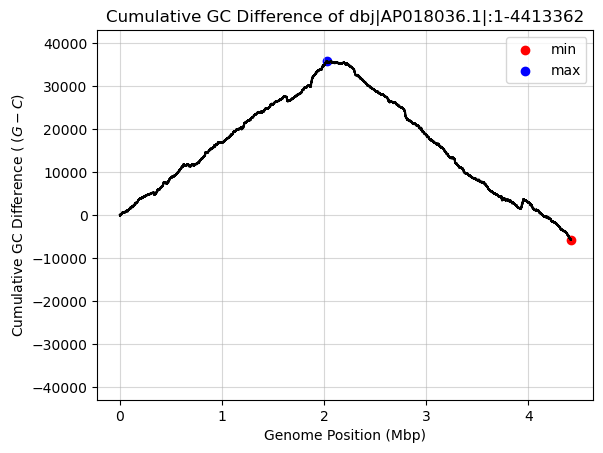

In [35]:
#You must provide a FASTA file as input, and the filename should be entered without the "/" symbol
file_path = input("Copy the file name : ").strip().strip("'").strip('"')
record = SeqIO.read(file_path, "fasta")
seq_str = str(record.seq).upper() #in case...

seq_bytes = np.array(list(seq_str.encode('ascii')), dtype=np.int8)
seq_array = np.zeros(len(seq_bytes), dtype=np.int8)
seq_array[seq_bytes == ord('C')] = 1
seq_array[seq_bytes == ord('G')] = 2

diff_data = calculate_cumulative_diff(seq_array)
seq_length = len(diff_data)

min_idx = np.argmin(diff_data)
max_idx = np.argmax(diff_data)
abs_max = max(abs(diff_data[max_idx]), abs(diff_data[min_idx]))

#plot!
plt.figure()
plt.plot(np.arange(seq_length)/1e6, diff_data, color = 'black')
plt.title(f"Cumulative GC Difference of {record.id}")
plt.xlabel("Genome Position (Mbp)")
plt.ylabel("Cumulative GC Difference ( $(G-C)$")
plt.ylim([-abs_max*1.2, abs_max*1.2])
plt.grid(True, alpha = 0.5)

#ori?
min_idx = np.argmin(diff_data)
max_idx = np.argmax(diff_data)
plt.scatter(min_idx/1e6, diff_data[min_idx], color = 'red', label = "min")
plt.scatter(max_idx/1e6, diff_data[max_idx], color = 'blue', label = "max")
plt.legend()

#save the graph as png file
safe_id = record.id.replace("|", "_").replace(":", "_")
plt.savefig(f"GC_Diff_{safe_id}.png", dpi=300, bbox_inches='tight', facecolor='white')

plt.show()